In [48]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from matplotlib.pyplot import cm

In [49]:
##Function to return the index of the element in vector x closest to the element x0
#x0 - double
#x  - vector

def to_index(x0, x):
    y = abs(x-x0)
    return np.argmin(y)

In [50]:
##Function to load the K1-part of a .h5 file
#filename - string with the file location, relative to current directory

def load_K1(filename, Lambda=0):
    with h5py.File(filename, 'r') as f:
        w = np.array(f["bfreqs"])
        v = np.array(f["ffreqs"])
        K1_a = np.array(f["K1_a"][Lambda])
        K1_p = np.array(f["K1_p"][Lambda])
        K1_t = np.array(f["K1_t"][Lambda])
    nw = len(w)
    K1a = np.zeros((2, nw), dtype=complex)
    K1p = np.zeros((2, nw), dtype=complex)
    K1t = np.zeros((2, nw), dtype=complex)
    for iK in range(2):
        for iw in range(nw):
            K1a[iK][iw] = K1_a[iK*nw+iw][0] + 1j*K1_a[iK*nw+iw][1]
            K1p[iK][iw] = K1_p[iK*nw+iw][0] + 1j*K1_p[iK*nw+iw][1]
            K1t[iK][iw] = K1_t[iK*nw+iw][0] + 1j*K1_t[iK*nw+iw][1]
    return w, v, K1a, K1p, K1t

In [51]:
##Function to load the K2-part of a .h5 file
#filename - string with the file location, relative to current directory

def load_K2(filename, Lambda=0):
    with h5py.File(filename, 'r') as f:
        w2 = np.array(f["bfreqs2"])
        v2 = np.array(f["ffreqs2"])
        K2_a = np.array(f["K2_a"][Lambda])
        K2_p = np.array(f["K2_p"][Lambda])
        K2_t = np.array(f["K2_t"][Lambda])
    nw2 = len(w2)
    nv2 = len(v2)
    K2a = np.zeros((5, nw2, nv2), dtype=complex)
    K2p = np.zeros((5, nw2, nv2), dtype=complex)
    K2t = np.zeros((5, nw2, nv2), dtype=complex)
    
    for iK in range(5):
        for iw in range(nv2):
            for iv in range(nv2):
                K2a[iK][iw][iv] = K2_a[iK*nw2*nv2+iw*nv2+iv][0] + 1j*K2_a[iK*nw2*nv2+iw*nv2+iv][1]
                K2p[iK][iw][iv] = K2_p[iK*nw2*nv2+iw*nv2+iv][0] + 1j*K2_p[iK*nw2*nv2+iw*nv2+iv][1]
                K2t[iK][iw][iv] = K2_t[iK*nw2*nv2+iw*nv2+iv][0] + 1j*K2_t[iK*nw2*nv2+iw*nv2+iv][1]
    return w2, v2, K2a, K2p, K2t

In [52]:
##Function to read a .h5 file with output structure following that of write_hdf-function in hdf5_routines.h
#filename - string with the file location, relative to current directory

def read_file(filename, Lambda=0):
    w, v, K1a, K1p, K1t = load_K1(filename, Lambda)    #Loads K1
    w2,v2,K2a, K2p, K2t = load_K2(filename, Lambda)    #Loads K2
    
    #Loads the rest of info
    with h5py.File(filename, 'r') as f:
        irred = np.array(f['irred'])
        lambdas = np.array(f['lambdas'])
        parameters = np.array(f['parameters'])
        selflist = np.array(f['selflist'])
        
    return w, v, K1a, K1p, K1t, w2, v2, K2a, K2p, K2t, irred, lambdas, parameters, selflist

In [53]:
##Function to plot a K1 object
#iK - Keldysh component (int, either 0 or 1)
#K1 - K1-type object (2-indexed)
#w  - bosonic freq grid for K1
#title - string with the title of the graph

def plot_K1(iK, K1, w, title):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32,8))
    fig.suptitle(title, fontsize=16)
    for i in range(2):
        #ax[i].set_xlim(np.array((-1,1))*2.0); 
        ax[i].set_xlim(w[0], w[-1]); 
        ax[i].set_xlabel('$\omega/\Gamma$');
        
    ax[0].plot(w, K1[iK].real, label="Re(${K_1^r}$)")
    ax[1].plot(w, K1[iK].imag, label="Im(${K_1^r}$)")
    
    for i in range(2):               
        ax[i].legend(loc='lower right');

In [57]:
##Function to plot a set of slices of K2 at all the w_0 values contained in w0
#iK - Keldysh component (int, between 0 and 5), 
#w0 - np.array of values
#K2 - K2-type of object (3-indexed)
#w  - bosonic freq grid for K2
#v  - fermionic freq grod for K2
#show - boolean to show special point at v=w0
#title - string with the title of the graph

def plot_K2_1D(iK, w0, K2, w, v, show, title=" "):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32,8))
    fig.suptitle(title, fontsize=16)

    for i in range(2):
        ax[i].set_xlim(np.array((-10,10))); 
        ax[i].set_xlabel('$\nu/\Gamma$');
        
    color=cm.viridis(np.linspace(0,1, len(w0)))
    for x,c in zip(w0,color):
        iw = to_index(x, w)
        ax[0].plot(v, K2[iK, iw].real, '.-', label="Re(${K_2^r}$) at w ="+str(x), color=c)
        ax[1].plot(v, K2[iK, iw].imag, '.-', label="Im(${K_2^r}$) at w ="+str(x), color =c)
        if show:
            iv=to_index(x, v)
            ax[0].plot(x, K2[iK, iw, iv].real, 'x', color='black')
            ax[1].plot(x, K2[iK, iw, iv].imag, 'x', color='black')
    
    for i in range(2):               
        ax[i].legend(loc='lower right');

In [55]:
def plot_K2_2D(iK, K2, w, v, title=" "):    
    X, Y = np.meshgrid(w,v)
    fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(32,12))
    c0 = ax1[0].pcolor(X, Y, K2[iK].real)
    ax1[0].title.set_text('Real part - Regular scale')
    c1 = ax1[1].pcolor(X, Y, np.log(np.abs(K2[iK].real)))
    ax1[1].title.set_text('Real part -Log scale')
    
    plt.colorbar(c0, ax=ax1[0])
    plt.colorbar(c1, ax=ax1[1])
    
    
    fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(32,12))
    c0 = ax2[0].pcolor(X, Y, K2[iK].imag)
    ax2[0].title.set_text('Imag part - Regular scale')
    c1 = ax2[1].pcolor(X, Y, np.log(np.abs(K2[iK].imag)))
    ax2[1].title.set_text('Imag part -Log scale')
    
    plt.colorbar(c0, ax=ax2[0])
    plt.colorbar(c1, ax=ax2[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


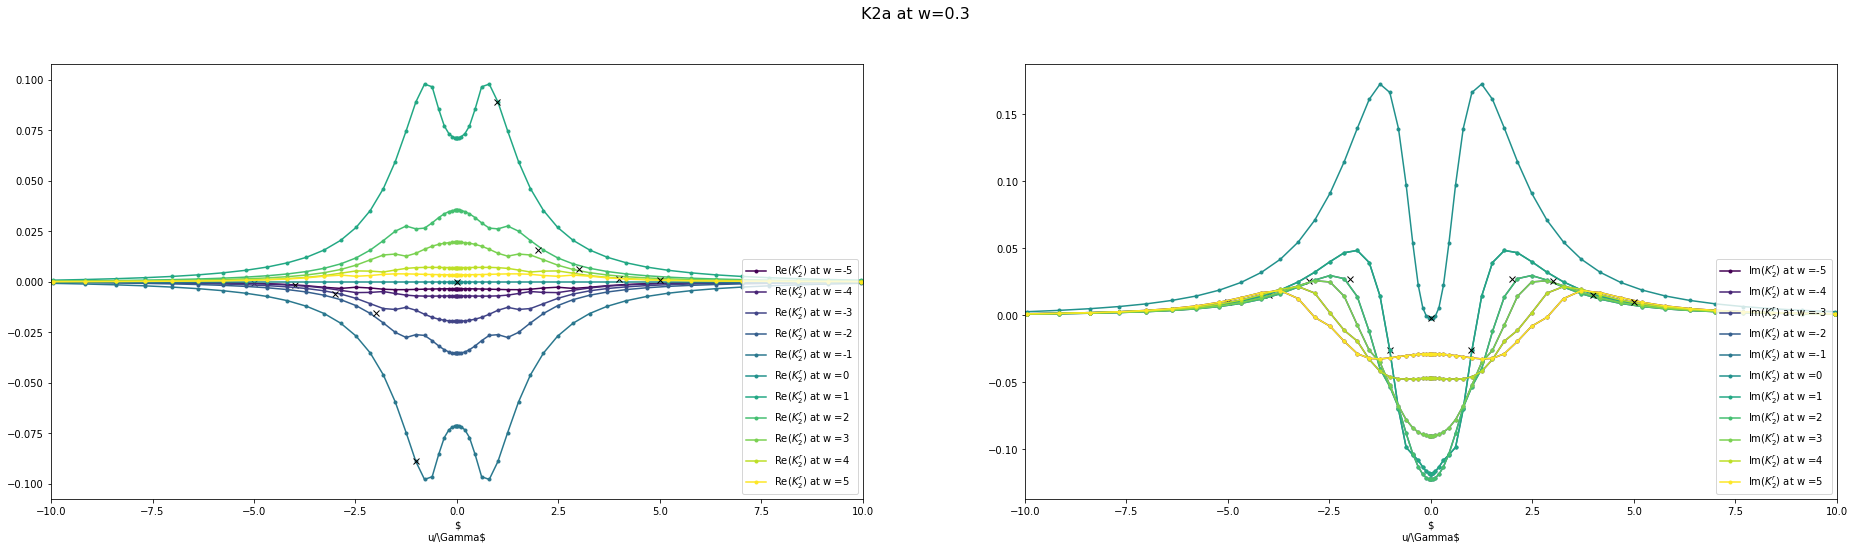

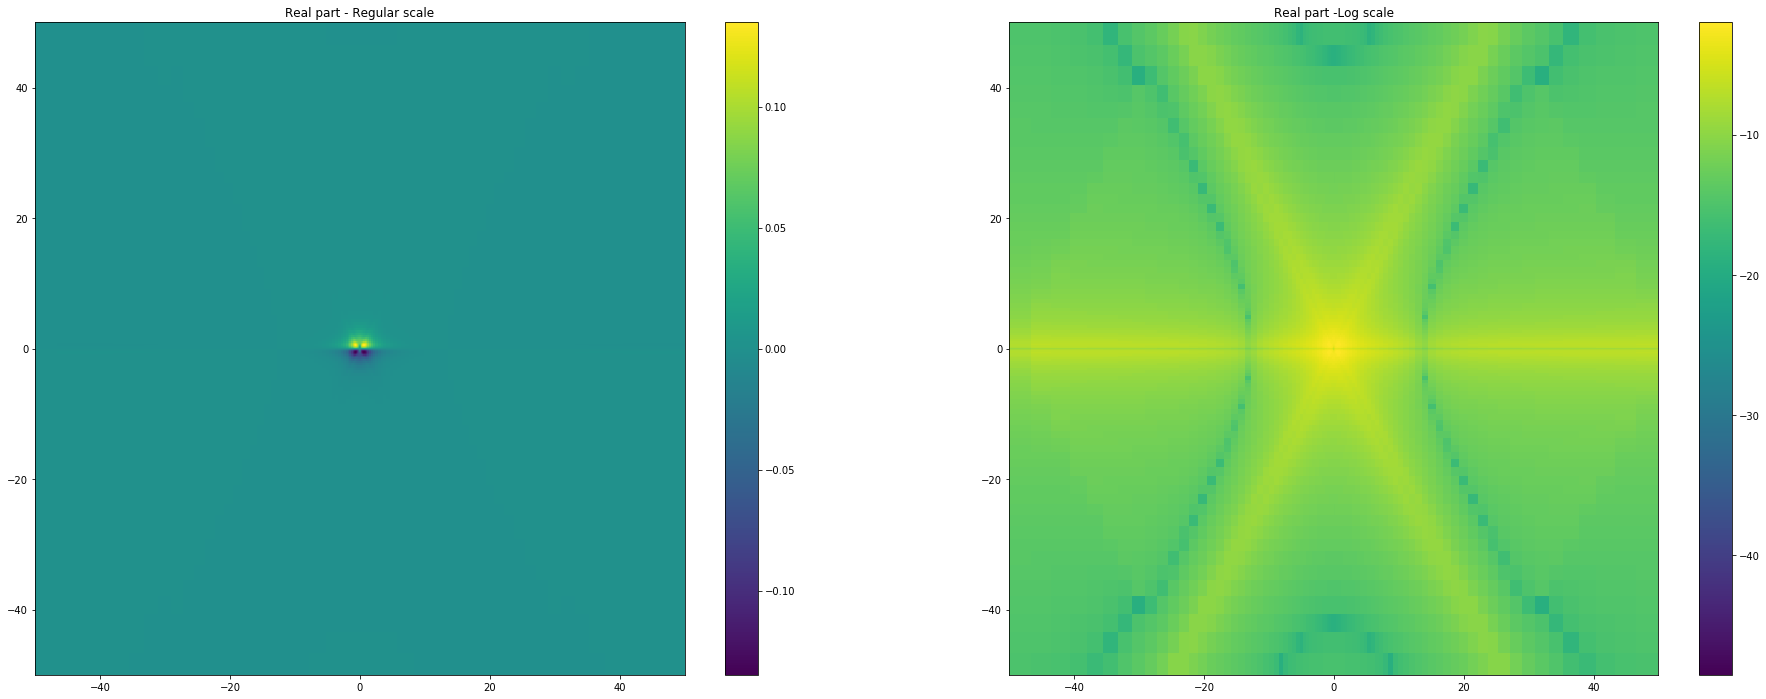

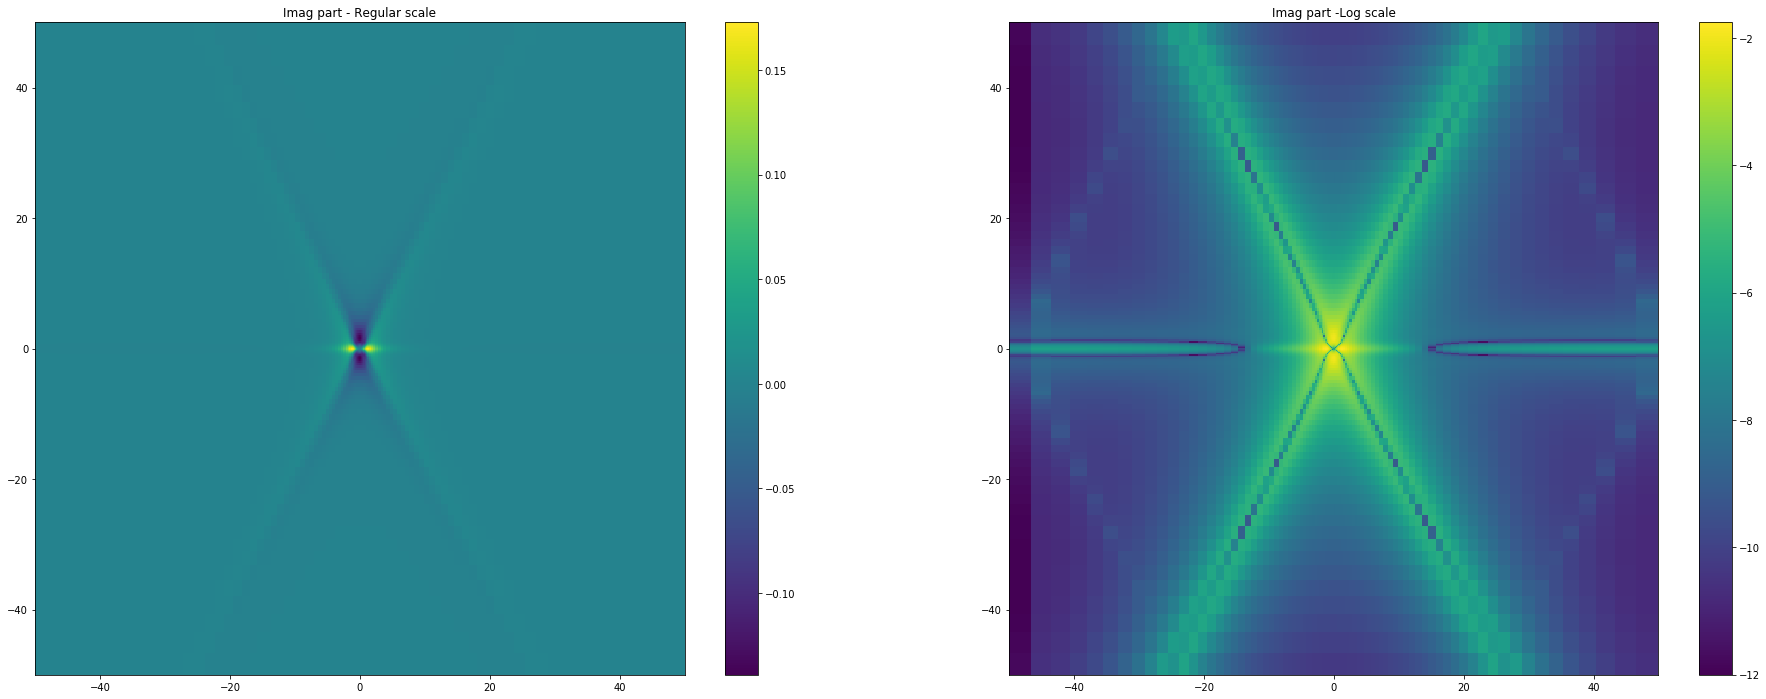

In [59]:
#The actual program

name = "PT4_check_of_K2a_state_PT3_K2a" #Give name of the .h5 file to be imported, without file type extension
filename = "../Data/" + name + ".h5"

#Reads all the elements in the file and saves them in the form of numpy arrays
w, v, K1a, K1p, K1t, w2, v2, K2a, K2p, K2t, irred, lambdas, parameters, selflist = read_file(filename)

#plot_1D(0, K1a, w, "K1a_0")
#plot_1D(1, K1p, w, "K1p_1")

w0 = np.arange(-5, 6, 1)

plot_K2_1D(0, w0, K2a, w2, v2, True, "K2a at w=0.3")
plot_K2_2D(0, K2a, w2, v2)

In [ ]:
print(keys)

In [ ]:
print(K2a[0][50][50])

In [ ]:
print(bfreqs)